# WATERMARKS

<hr style="border:2px solid gray"> </hr>

In this notebook, you are going to learn how to add watermarks to images. A watermark is typically a semi-transparent logo or message added to an image to convey some additional information without detracting from the image. We will demonstrate how to create watermarks by first showing how to add a logo to an image. Then we will take it a step further and show you how to blend a logo with an image that has a much more subdued effect.

### Learning Objective
**Learn the use of following functions:**
 - addWeighted()
 - add()
 
**Learn the concept of:**
 - Masking
 - foreground and background extraction
 
We will be working with the following logos and images to create watermarks.
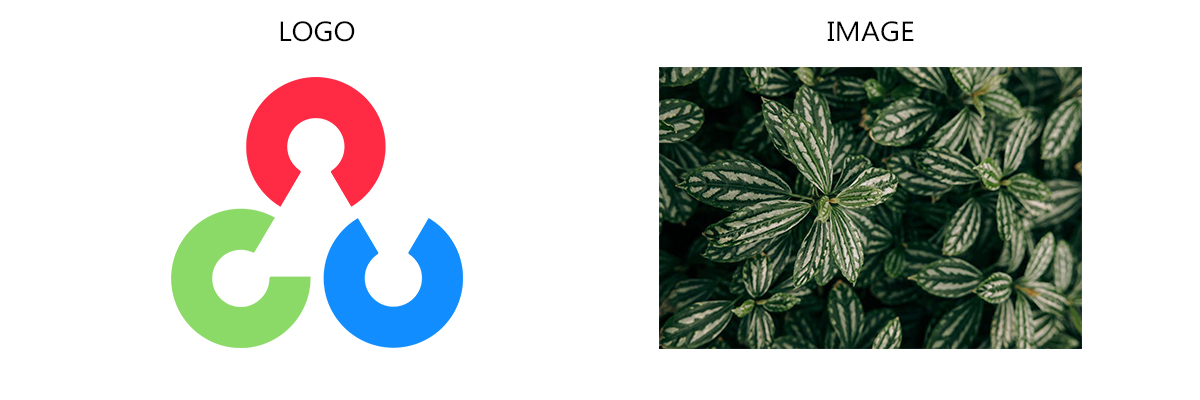

<hr style="border:2px solid gray"> </hr>

# Method 1
<hr style="border:2px solid gray"> </hr>

## Preliminary (adding logo to image) 
This method works well with logos with both white and black backgrounds. Except this does not provide transparency effect. Here, we are going to learn how to use `bitwise_and()`, `bitwise_not()`, and `add()` function to carry out the operation.


## Goal
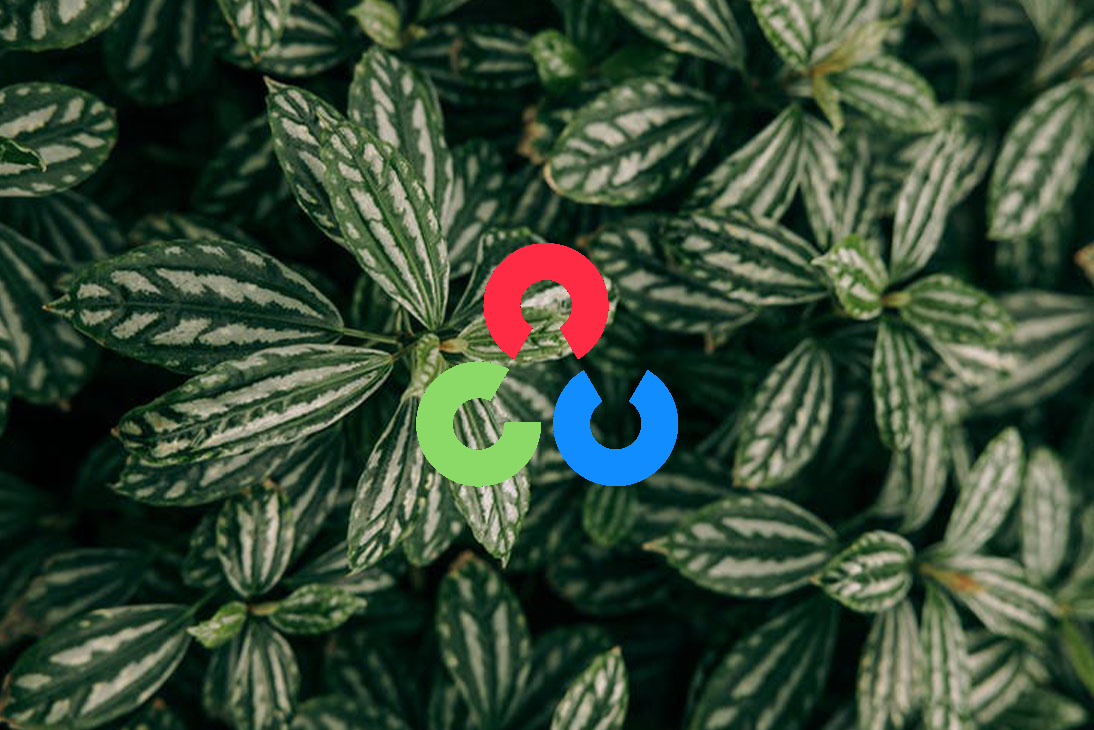
                                  
## Workflow
 - Extract the foreground and background masks of the logo
 - Find ROI
 - Perform `bitwise_and()` on foreground mask and ROI
 - Perform `bitwise_and()` on background mak and the original logo 
 - Use `add()` to combine the logo foreground on the ROI background
 - Insert the combined watermark patch in the image
 
<hr style="border:2px solid gray"> </hr>


## Import Libraries

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['figure.figsize'] = (15,15)

Image size :  (730, 1094, 3)
Logo size :  (2436, 2623, 3)


Text(0.5, 1.0, 'Logo')

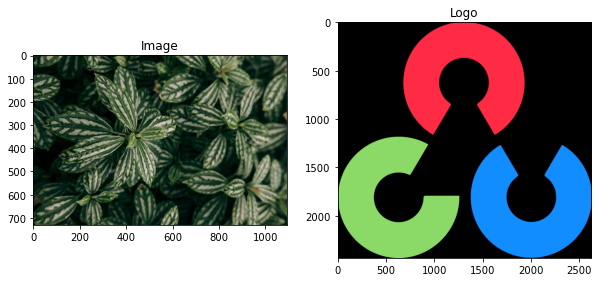

In [2]:
# Load image and logo
img = cv2.imread('leaves.jpg')
logo = cv2.imread('opencv_logo.png')

# Check dimensions
print('Image size : ', img.shape)
print('Logo size : ', logo.shape)

# Display
plt.figure(figsize=(10,10))
plt.subplot(121); plt.imshow(img[:,:,::-1]);plt.title('Image');
plt.subplot(122); plt.imshow(logo[:,:,::-1]);plt.title('Logo')

<hr style="border:2px solid gray"> </hr>

## Reduce the size of the OpenCV logo to be more consistent with the image
### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

[**`resize()`**](https://docs.opencv.org/4.5.2/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d)

<hr style="border:2px solid gray"> </hr>

Text(0.5, 1.0, 'Resized logo')

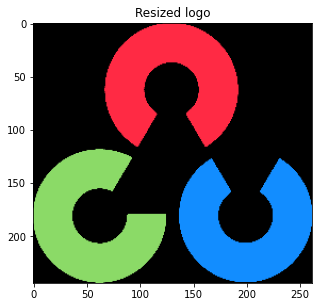

In [3]:
logo_res = cv2.resize(logo, None, fx=0.1, fy=0.1, interpolation = cv2.INTER_LINEAR)
plt.figure(figsize=(5,5))
plt.imshow(logo_res[:,:,::-1])
plt.title('Resized logo')

In [4]:
# retrieve the image and logo shape
img_h, img_w, _ = img.shape
logo_h, logo_w, _ = logo_res.shape

<hr style="border:2px solid gray"> </hr>

## Determine the Region of Interest (ROI) in the image

### <font style="color:rgb(8,133,37)">Place the logo at the center of the image</font>
The ROI or region of interest is the area on which we are going to superimpose the logo. We are going to place the logo in the center of the image. Following illustration provides a rough idea.<br>
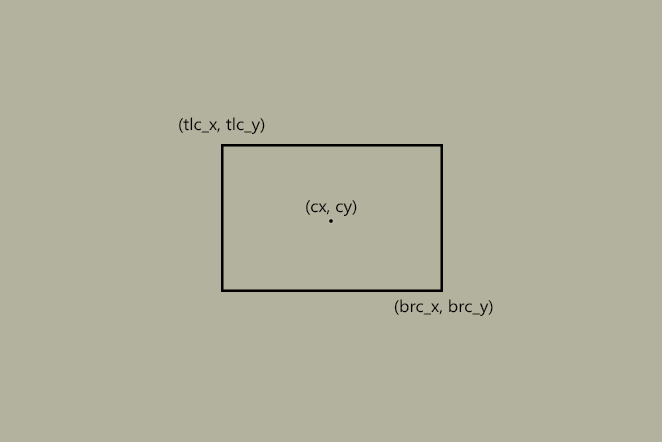

<hr style="border:2px solid gray"> </hr>

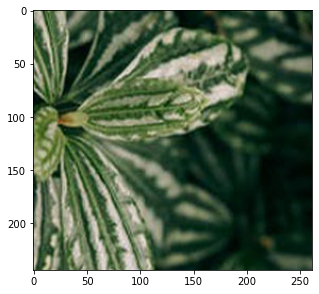

In [5]:
# Cx and Cy are centre of the image
cx = int(img_w/2)
cy = int(img_h/2)

# tlc : top left corner
tlc_x = int(cx - logo_w/2)
tlc_y = int(cy - logo_h/2)

# brc : bottom right corner
brc_x = int(cx + logo_w/2)
brc_y = int(cy + logo_h/2)

# Get region of interest
roi = img[tlc_y:brc_y, tlc_x:brc_x]

# display
plt.figure(figsize=(5,5))
plt.imshow(roi[:,:,::-1])

<hr style="border:2px solid gray"> </hr>

## Create Logo Masks
### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

[**`bitwise_not()`**](https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#ga0002cf8b418479f4cb49a75442baee2f)

<hr style="border:2px solid gray"> </hr>

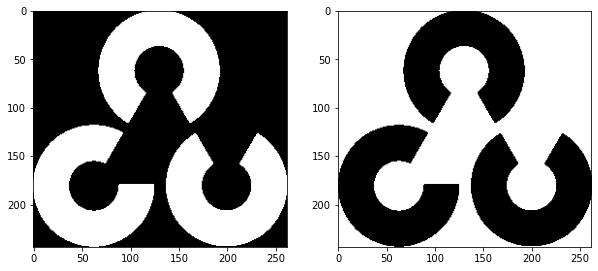

In [6]:
# Convert logo to gray scale
opencv_gray = cv2.cvtColor(logo_res,cv2.COLOR_BGR2GRAY)

# Apply threholding to extract mask
ret,mask = cv2.threshold(opencv_gray,10,255,cv2.THRESH_BINARY)

# Invert the mask
mask_inv = cv2.bitwise_not(mask)

# Display
plt.figure(figsize=(10,10))
plt.subplot(121); plt.imshow(mask);
plt.subplot(122); plt.imshow(mask_inv);


<hr style="border:2px solid gray"> </hr>

## Set up ROI background and Logo foreground
### <font style="color:rgb(8,133,37)">Function Syntax </font>
``` python
dst	=	cv2.bitwise_and( src1, src2[, dst[, mask]] ) 
```
`dst`: Is the output image of the same size and depth as `src1` and `src2`.

The function has **3 required arguments**:

1. `src1`: first input array or a scalar.
2. `src2`: second input array or a scalar.
3. `dst`: output array that has the same size and type as the input array(s)

The function has **1 optional argument**:
1. `mask`: optional operation mask, 8-bit single channel array, that specifies elements of the output array to be changed.

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>


[**`bitwise_and()`**](https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#ga60b4d04b251ba5eb1392c34425497e14)

<hr style="border:2px solid gray"> </hr>


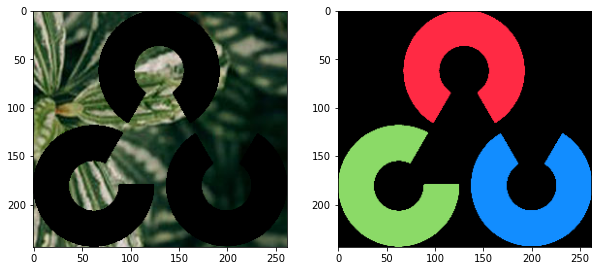

In [7]:
# create a copy of roi and image to keep the original patch intact
roi_1 = roi.copy()
img_1 = img.copy()

bg = cv2.bitwise_and(roi_1, roi_1, mask = mask_inv)
fg = cv2.bitwise_and(logo_res, logo_res, mask = mask)

# Display
plt.figure(figsize=(10,10))
plt.subplot(121); plt.imshow(bg[:,:,::-1]);
plt.subplot(122); plt.imshow(fg[:,:,::-1]);


<hr style="border:2px solid gray"> </hr>

### <font style="color:rgb(8,133,37)">Function Syntax </font>
``` python
dst	=	cv2.add(src1, src2[, dst[, mask[, dtype]]])
```
`dst`: Is the output image of the same size and depth as `src1` and `src2`.

The function has **3 required arguments**:

1. `src1`: first input array or a scalar.
2. `src2`: second input array or a scalar.
3. `dst`: output array that has the same size and number of channels as the input array(s); the depth is defined by dtype or src1/src2.

The function has **2 optional argument**:
1. `mask`: optional operation mask - 8-bit single channel array, that specifies elements of the output array to be changed.
2. `dtype`: optional depth of the output array (see the discussion below).

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

[**`add()`**](https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#ga10ac1bfb180e2cfda1701d06c24fdbd6)

<hr style="border:2px solid gray"> </hr>

True

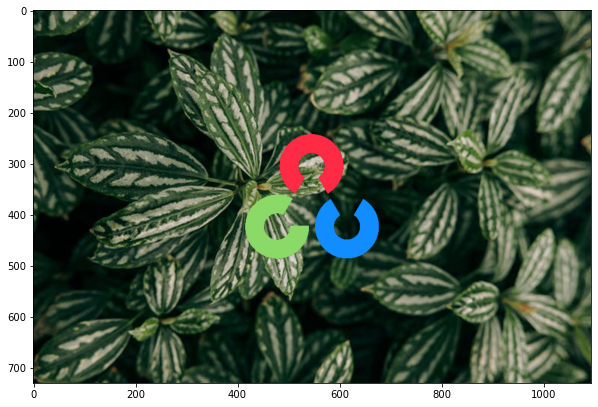

In [13]:
# Add the foreground and background
patch = cv2.add(fg,bg)

# Insert the patch in the image
img_1[tlc_y:brc_y, tlc_x:brc_x] = patch

# Display
plt.figure(figsize=(10,10))
plt.imshow(img_1[:,:,::-1])

# write to disk
cv2.imwrite('watermarked_method_1.jpg', img_1)

# Method 2

<hr style="border:2px solid gray"> </hr>

## Watermarking (adding a semi-transparent logo)

Now that we know how to make straight forward watermark, let's take a look at another mathod which provides transparency effect.
## Goal
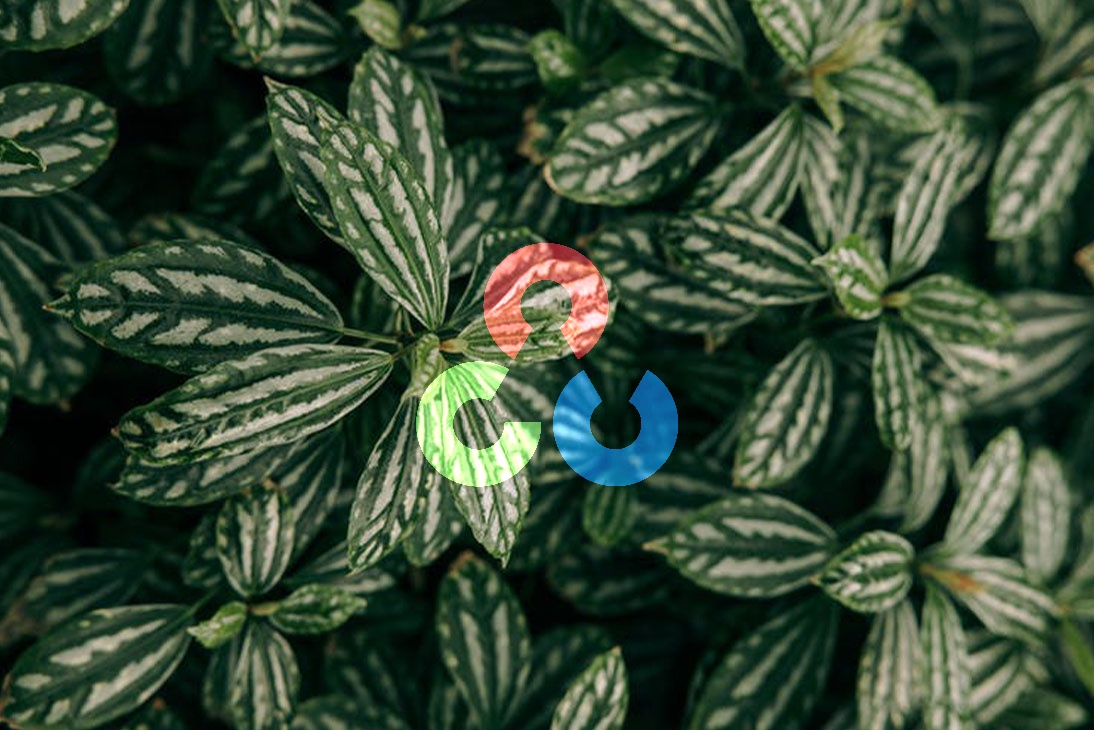

### Workflow
1. Resize the image to a suitable size if required
2. Check height and width of logo
3. Get ROI from image according to height and width of the logo
4. Perform `addWeighted()` operation

<hr style="border:2px solid gray"> </hr>


Text(0.5, 1.0, 'Image')

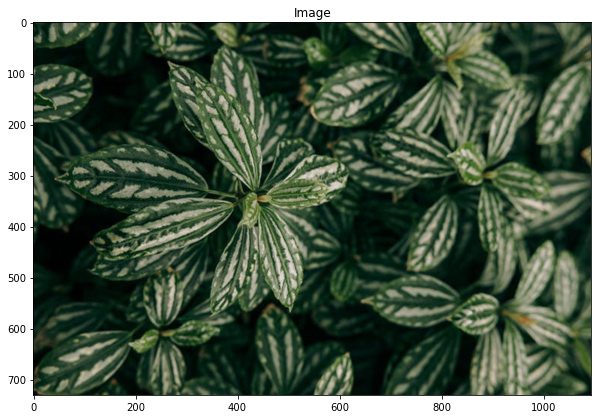

In [9]:
# Load Image
img_2 = img.copy()

# Display
plt.figure(figsize=(10,10))
plt.imshow(img_2[:,:,::-1]) 
plt.title('Image')

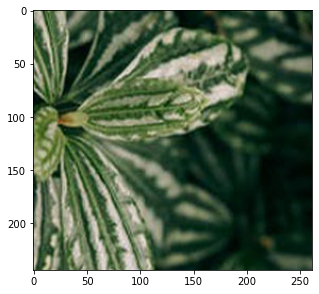

In [10]:
roi_2 = roi.copy()
plt.figure(figsize=(5,5))
plt.imshow(roi_2[:,:,::-1])

<hr style="border:2px solid gray"> </hr>

## Superimpose logo with image ROI
We are using `addWeighted()` function to put the watermarks. You can play with the values of alpha and beta to generate different results.
### <font style="color:rgb(8,133,37)">Function Syntax </font>
``` python
dst	=	cv2.addWeighted(src1, alpha, src2, beta, gamma[, dst[, dtype]]	)
```
`dst`: Is the output image of the same size and depth as `src1` and `src2`.

The function has **5 required arguments**:

1. `src`: first input array.
2. `alpha`: weight of the first array elements.
3. `src2`:	second input array.
4. `beta`: weight of the second array elements.
5. `gamma`: scalar added to each sum.

The function has **1 optional argument**:
1. `dtype` : optional depth of the output array; when both input arrays have the same depth, dtype can be set to -1, which will be equivalent to `src1.depth()`.

<hr style="border:2px solid gray"> </hr>



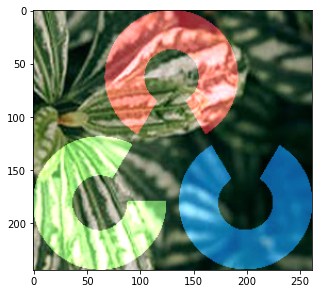

In [11]:
# blend ROI and the logo
watermarked = cv2.addWeighted(roi_2, 1, logo_res, 0.6, 0)

# display
plt.figure(figsize=(5,5))
plt.imshow(watermarked[:,:,::-1])

## Replace image patch with watermark patch


True

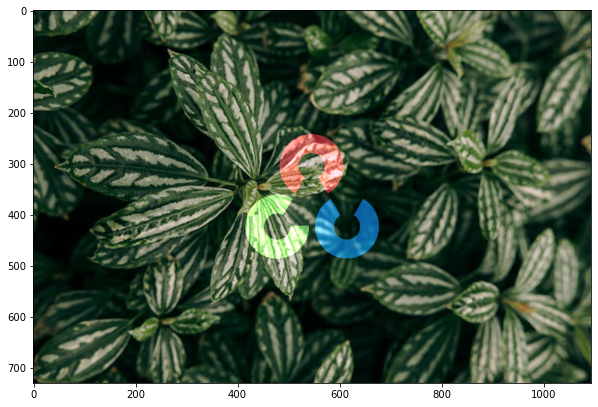

In [14]:
# Insert the watermarked patch in the image
img_2[tlc_y:brc_y, tlc_x:brc_x] = watermarked

# display
plt.figure(figsize=(10,10))
plt.imshow(img_2[:,:,::-1])

# write to disk
cv2.imwrite('watermarked_method_2.jpg',img_2)


## Conclusion
So we have seen different methods to apply watermark to images. Both methods have their advantages and disadvantages. Finally, it's really upto the users which function to use.